### 【問題1】1次関数
```
-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。
```

In [11]:
import numpy as np
x_list = np.arange(-50, 50.1, 0.1)
y_list = np.array([ x/2 +1 for x in x_list ])
print(x_list)
print(y_list)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


### 【問題2】配列の結合
```
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。
```

In [18]:
mix = np.concatenate([x_list, y_list]).reshape([2, 1001])
print(mix)

[[-50.   -49.9  -49.8  ...  49.8   49.9   50.  ]
 [-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]]


### 【問題3】勾配を求める
```
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。
```

In [34]:
x_slope =  x_list[1:] - x_list[:-1]
y_slope =  y_list[1:] - y_list[:-1]
slopes = y_slope / x_slope
print(slopes)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

### 【問題4】グラフを描く
```
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。
```

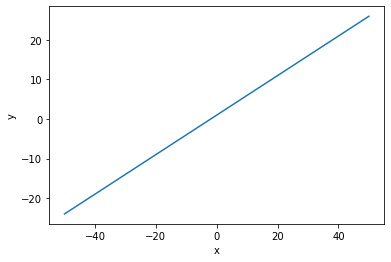

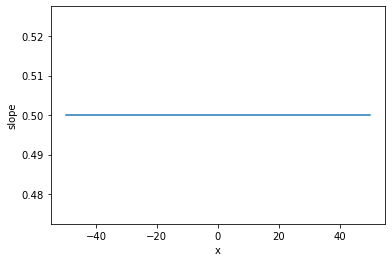

In [36]:
import matplotlib.pyplot as plt
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_list, y_list)
plt.show()

plt.xlabel("x")
plt.ylabel("slope")
plt.plot(x_list[1:], slopes)
plt.show()

### 【問題5】Pythonの関数化
```
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。
そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。
```

In [88]:
def compute_gradient(function, x_range=np.arange(-50, 50.1, 0.1)):
    """
    変化量を使い勾配を計算する。
    Parameters
    ----------------
    function : function
      求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
      np.arange()の引数と同じ方法で範囲を指定する。
    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
      関数の勾配。差をとるため要素は1つ減る
    """
    x_list = x_range
    x_gra =  x_list[1:] - x_list[:-1]
    y_list = function(x_range)
    y_gra =  y_list[1:] - y_list[:-1]
    gradient = y_gra / x_gra
    array_xy = np.concatenate([x_list, y_list]).reshape([2, len(x_range)])
    return array_xy, gradient

def function1(array_x):
    return array_x**2

def function2(array_x):
    array_y = np.array([], dtype=np.float128)
    for i in range(len(array_x)):
        x = array_x[i]
        array_y = np.append(array_y, [(2 * (x**2) + (2**x))] )
    return np.array(array_y)

def function3(array_x):
    array_y = np.array([], dtype=np.float128)
    for i in range(len(array_x)):
        x = array_x[i]
        array_y = np.append(array_y, [np.sin(x) / 2] )
    return np.array(array_y)

array_xy1, gradient1 = compute_gradient(function1, x_range=np.arange(-50, 50.1, 0.1) )
print(gradient1)
array_xy2, gradient2 = compute_gradient(function2, x_range=np.arange(-50, 50.1, 0.1) )
print(gradient2)
array_xy3, gradient3 = compute_gradient(function3, x_range=np.arange(0 -50.1, 0.1) )
print(gradient3)

[-99.9 -99.7 -99.5 -99.3 -99.1 -98.9 -98.7 -98.5 -98.3 -98.1 -97.9 -97.7
 -97.5 -97.3 -97.1 -96.9 -96.7 -96.5 -96.3 -96.1 -95.9 -95.7 -95.5 -95.3
 -95.1 -94.9 -94.7 -94.5 -94.3 -94.1 -93.9 -93.7 -93.5 -93.3 -93.1 -92.9
 -92.7 -92.5 -92.3 -92.1 -91.9 -91.7 -91.5 -91.3 -91.1 -90.9 -90.7 -90.5
 -90.3 -90.1 -89.9 -89.7 -89.5 -89.3 -89.1 -88.9 -88.7 -88.5 -88.3 -88.1
 -87.9 -87.7 -87.5 -87.3 -87.1 -86.9 -86.7 -86.5 -86.3 -86.1 -85.9 -85.7
 -85.5 -85.3 -85.1 -84.9 -84.7 -84.5 -84.3 -84.1 -83.9 -83.7 -83.5 -83.3
 -83.1 -82.9 -82.7 -82.5 -82.3 -82.1 -81.9 -81.7 -81.5 -81.3 -81.1 -80.9
 -80.7 -80.5 -80.3 -80.1 -79.9 -79.7 -79.5 -79.3 -79.1 -78.9 -78.7 -78.5
 -78.3 -78.1 -77.9 -77.7 -77.5 -77.3 -77.1 -76.9 -76.7 -76.5 -76.3 -76.1
 -75.9 -75.7 -75.5 -75.3 -75.1 -74.9 -74.7 -74.5 -74.3 -74.1 -73.9 -73.7
 -73.5 -73.3 -73.1 -72.9 -72.7 -72.5 -72.3 -72.1 -71.9 -71.7 -71.5 -71.3
 -71.1 -70.9 -70.7 -70.5 -70.3 -70.1 -69.9 -69.7 -69.5 -69.3 -69.1 -68.9
 -68.7 -68.5 -68.3 -68.1 -67.9 -67.7 -67.5 -67.3 -6

### 【問題6】最小値を求める
```
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。
今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。
minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。
また、最小のyをとる前後の勾配を表示してください。
```

In [91]:
# 問題の説明が曖昧で、正確に何をすべきかがわかりませんでした。
# 特に「また、最小のyをとる前後の勾配を表示してください。」このあたり。
# そのため、「minメソッドとargminメソッド の扱いを覚えるための問題」という解釈で、
# コーディングを行います。

print(f"function1の最小値: {array_xy1.min()} 前の勾配: {gradient1[array_xy1.argmin()-1]} 後の勾配:{gradient1[array_xy1.argmin()+1]}")
print(f"function2のyの最小値: {array_xy1.min()} 前の勾配: {gradient1[array_xy1.argmin()-1]} 後の勾配:{gradient1[array_xy1.argmin()+1]}")
print(f"function3のyの最小値: {array_xy1.min()} 前の勾配: {gradient1[array_xy1.argmin()-1]} 後の勾配:{gradient1[array_xy1.argmin()+1]}")


array_xy1の最小値: -50.0 前の勾配: 99.9000000000035 後の勾配:-99.70000000000113
